<a href="https://colab.research.google.com/github/serzaraisk/100-pandas-puzzles/blob/master/ImagePyramids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/apple.jpg
!wget http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/orange.jpg

--2021-06-06 17:48:44--  http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/apple.jpg
Resolving pages.cs.wisc.edu (pages.cs.wisc.edu)... 128.105.7.26
Connecting to pages.cs.wisc.edu (pages.cs.wisc.edu)|128.105.7.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51705 (50K) [image/jpeg]
Saving to: ‘apple.jpg’

apple.jpg           100%[===================>]  50.49K   139KB/s    in 0.4s    

2021-06-06 17:48:45 (139 KB/s) - ‘apple.jpg’ saved [51705/51705]

--2021-06-06 17:48:45--  http://pages.cs.wisc.edu/~csverma/CS766_09/ImageMosaic/orange.jpg
Resolving pages.cs.wisc.edu (pages.cs.wisc.edu)... 128.105.7.26
Connecting to pages.cs.wisc.edu (pages.cs.wisc.edu)|128.105.7.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50036 (49K) [image/jpeg]
Saving to: ‘orange.jpg’

orange.jpg          100%[===================>]  48.86K   135KB/s    in 0.4s    

2021-06-06 17:48:46 (135 KB/s) - ‘orange.jpg’ saved [50036/50036]



In [85]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import scipy
from scipy import signal
import cv2

In [10]:
def read_image(path):
    "read image from file by path"
    return mpimg.imread(path)

def show_image(image):
    'show image, presented as matrix'
    plt.figure()
    return plt.imshow(image)

# Simple preprocessing

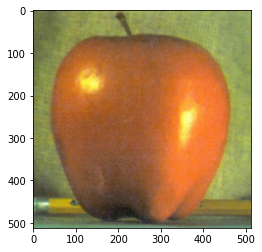

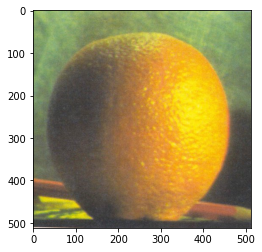

In [13]:
#original images
apple = read_image('apple.jpg')
orange = read_image('orange.jpg')
show_image(apple)
show_image(orange)

## Point preprocessing

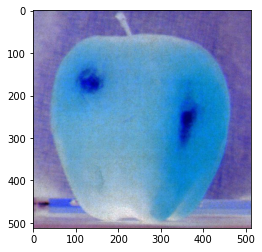

In [18]:
show_image(255-apple)

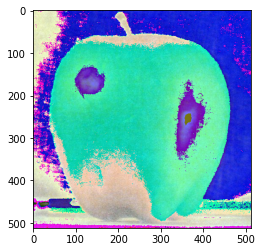

In [19]:
show_image(apple+122)

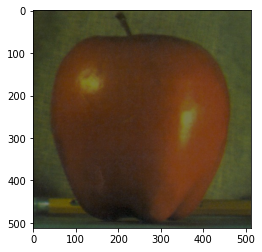

In [26]:
show_image(np.array(np.round(apple/2), dtype='int'))

## Mean Filter (Blur)

In [27]:
image.shape

(512, 512, 3)

In [59]:
kernel = 20
blur = np.ones((kernel,kernel))/(kernel**2)

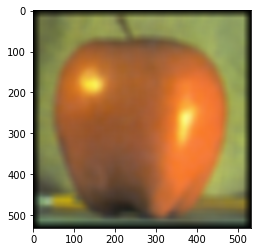

In [62]:
blured_image = np.array(np.concatenate([signal.convolve2d(image[:,:,0].squeeze(), blur)[:,:,None], 
           signal.convolve2d(image[:,:,1].squeeze(), blur)[:,:,None],
        signal.convolve2d(image[:,:,2].squeeze(), blur)[:,:,None]], axis=2), dtype='int')

show_image(blured_image)

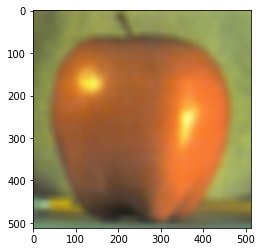

In [87]:
#cv2 implementation
show_image(cv2.filter2D(image, -1, blur))

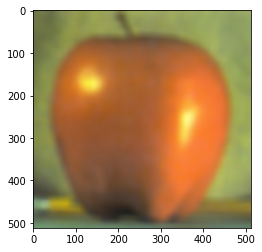

In [89]:
# mean filter = cv2.boxfilter
show_image(cv2.boxFilter(image, -1, (kernel, kernel)))

Mean filter is a separable filter (can be expressed as row and column vector). 
- Describes only small subset of filters
+ Has better computational cost: 2KN^2 to K^2N^2

## Gaussian Filter

Filter, which has reduced weights with the center, according to gaussian distribution.

In [63]:
kernel_example = 1/16 * np.array([[1,2,1], [2,4,2], [1,2,1]])

In [64]:
kernel_example

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

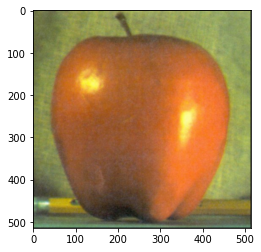

In [65]:
blured_image = np.array(np.concatenate([signal.convolve2d(image[:,:,0].squeeze(), kernel_example)[:,:,None], 
           signal.convolve2d(image[:,:,1].squeeze(), kernel_example)[:,:,None],
        signal.convolve2d(image[:,:,2].squeeze(), kernel_example)[:,:,None]], axis=2), dtype='int')

show_image(blured_image)

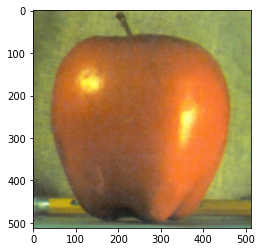

In [93]:
# cv2 implementation
show_image(cv2.GaussianBlur(image, ksize=(5, 5), sigmaX=1))

## Border Detections

Border Detections can be obtained by computing gradients to the images

In [72]:
# Sobel filter is deconmposed of vector which computes gradient and vertical blurring
hor_sobel_filter = np.array([1, 2, 1]).reshape(-1,1) @ np.array([1,0,-1]).reshape(1,-1)
ver_sobel_filter = hor_sobel_filter.T
ver_sobel_filter

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


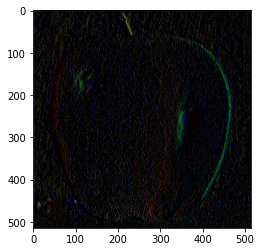

In [76]:
blured_image = np.concatenate([signal.convolve2d(image[:,:,0].squeeze(), hor_sobel_filter)[:,:,None], 
           signal.convolve2d(image[:,:,1].squeeze(), hor_sobel_filter)[:,:,None],
        signal.convolve2d(image[:,:,2].squeeze(), hor_sobel_filter)[:,:,None]], axis=2)

show_image(blured_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


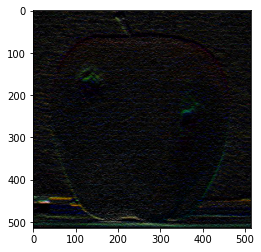

In [75]:
blured_image = np.concatenate([signal.convolve2d(image[:,:,0].squeeze(), ver_sobel_filter)[:,:,None], 
           signal.convolve2d(image[:,:,1].squeeze(), ver_sobel_filter)[:,:,None],
        signal.convolve2d(image[:,:,2].squeeze(), ver_sobel_filter)[:,:,None]], axis=2)

show_image(blured_image)

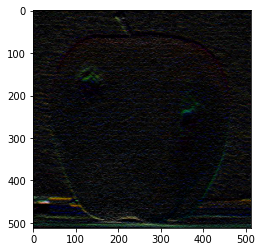

In [97]:
# cv2 implementation
show_image(cv2.Sobel(image,-1, dx=0, dy=1))

## Laplace Filter

It's a second direvative filter

LOG = First use Gausian filter then Laplace

In [ ]:
laplace_filter = np.array([1, 2, 1]).reshape(-1,1) @ np.array([1,-2, 1]).reshape(1,-1)

# Downsampling and gaussian pyramids 

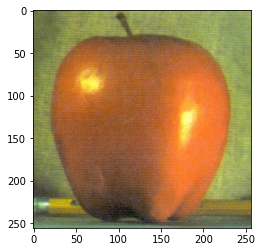

In [81]:
#take half rows and half columns
downsampled = image[::2,::2]
show_image(downsampled)

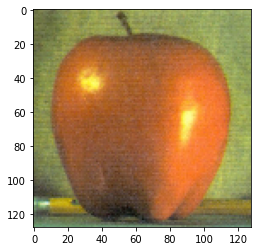

In [82]:
downsampled = downsampled[::2,::2]
show_image(downsampled)

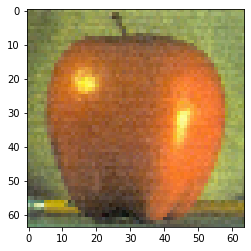

In [83]:
downsampled = downsampled[::2,::2]
show_image(downsampled)

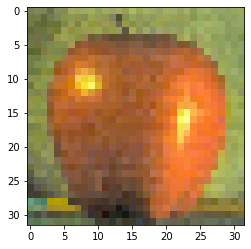

In [84]:
downsampled = downsampled[::2,::2]
show_image(downsampled)

**Gaussian pyramid** is a sequence of blurred and downsampled images

Algorithm:
- Blur the last image
- Take even rows and columns
- Store in the list

Uniform color regions = lower frequences part of the image

Image details = Higher frequences

**Laplacian pyramid** stores residuals

Decompose:
* Blur image
* Store residuals between original and blur
* Downsample blured image
* repeat
* store last blured image


Restore:
* Upsample the last blured image
* Add residuals
* repeat

Used Noise reduction or Image blending


## Morphological image processing

### Dillation

## Erosion

## Opening (reduce noise)

Erosion => Dillation

## Closing (will gaps in the image)

Dillation => Erosion

## Distance Transform

For each True pixel computes distance to the border

In [ ]:
### Dilla

In [110]:
(1000 * 1080 * 1920 )/(10**6)

2073.6

In [109]:
image = np.array([[115,65,120,103,101],
                  [124,60,100,89,100],
                  [170, 67, 114, 87, 75]])
res = signal.convolve2d(image, np.array([[-1, 0, 1],
                                   [-2, 0, 2],
                                   [-1, 0, 1]                                  
]), mode='valid')
res.max() - res.min()

215

# Image Blending

In this assignment you should implement the blending of the two images. You can download images with the cell above.

In order to blend the images, you should follow the following steps:

1. Construct the Laplacian Pyramids for each image
2. Now we should blend two pyramids: construct the third pyramid where you take first half of the image from the left pyramid and second half of the image from the right pyramid.
3. Reconstruct the original image with the new merged pyramid

You should obtain the following result:

**Laplacian pyramid** stores residuals

Decompose:
* Blur image
* Store residuals between original and blur
* Downsample blured image
* repeat
* store last blured image


Restore:
* Upsample the last blured image
* Add residuals
* repeat


In [270]:
def Laplacian_pyramids(image, order):
    result = []
    img = image.copy()

    for i in range(order):
        #print(i)
        original = img.copy()
        img = cv2.GaussianBlur(img, ksize=(3, 3), sigmaX=1)
        res_img = original - img
        result.append(res_img)
        #print(original[:10,:10,0])
        #print(img[:10,:10,0])
        img = img[::2, ::2]
        #print(res_img[:10,:10,0])
    result.append(img)
    return result
laplacian_apple = Laplacian_pyramids(apple, 3)
laplacian_orange = Laplacian_pyramids(orange, 3)

In [271]:
laplacian_orange[-1].shape

(64, 64, 3)

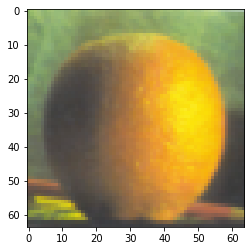

In [272]:
show_image(laplacian_orange[-1])

In [273]:
def blend_pyramids(pyr1, pyr2):
    res = []
    for i in range(len(pyr1)):
        len_ = int(pyr1[i].shape[1]/2)
        img = np.concatenate([pyr1[i][:,:len_,:], pyr2[i][:,len_:,:]], axis=1)
        #print(img == pyr1[i])
        res.append(img)
    return res
blended_pyr = blend_pyramids(laplacian_apple, laplacian_orange)

In [276]:
def reconstruct_pyr(pyr):
    blended = pyr[-1]
    for res in pyr[:-1][::-1]:
        blended = np.kron(blended, np.ones((2,2,1)))
        blended = np.array(blended, dtype='uint8')
        blended += res
    return blended
result = reconstruct_pyr(blended_pyr)

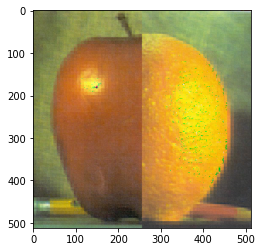

In [277]:
show_image(result)

In [279]:
!wget https://surfertas.github.io/static/img/posts/eye.png
!wget https://surfertas.github.io/static/img/posts/mask.png
!wget https://surfertas.github.io/static/img/posts/hand.png

--2021-06-06 20:38:26--  https://surfertas.github.io/static/img/posts/eye.png
Resolving surfertas.github.io (surfertas.github.io)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to surfertas.github.io (surfertas.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 352991 (345K) [image/png]
Saving to: ‘eye.png’

eye.png             100%[===================>] 344.72K  --.-KB/s    in 0.08s   

2021-06-06 20:38:27 (4.25 MB/s) - ‘eye.png’ saved [352991/352991]

--2021-06-06 20:38:27--  https://surfertas.github.io/static/img/posts/mask.png
Resolving surfertas.github.io (surfertas.github.io)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to surfertas.github.io (surfertas.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23812 (23K) [image/png]
Saving to: ‘mask.png’

mask.png            100%[===================>]  23.25K  --.-KB/s    in 0.006s  

2021-06

# Image Blending with Mask

In general, we can have an arbirtary mask and blend two images according to this mask. The procedure is the following:

1. Construct laplacian pyramids for 2 images that you want to blend
2. Construct gaussian pyramid for a mask
3. Compute weighted sum for each level of the pyramid
$$
L = L_1 \alpha + L_2 (1 - \alpha)
$$

4. Reconstruct the image from the blended pyramid

You should obtain the following result.

In [290]:
eye = read_image('eye.png')
mask = read_image('mask.png')
hand = read_image('hand.png')

In [306]:
mask.shape

(1260, 960)

In [313]:
pyr_eye = Laplacian_pyramids(eye,2) 
pyr_hand = Laplacian_pyramids(hand,2) 

In [314]:
pyr_hand[-1].shape

(315, 240, 3)

In [315]:
len(pyr_hand)

3

In [316]:
def gaussian_pyr(image, order):
    result = []
    img = image.copy()

    for i in range(order):
        result.append(img)
        img = cv2.GaussianBlur(img, ksize=(3, 3), sigmaX=1)
        img = img[::2, ::2]
        
    return result    

In [317]:
pyr_mask = gaussian_pyr(mask, 3)

In [357]:
pyr_hand[-1]

array([[[0.89981854, 0.89589703, 0.9155048 ],
        [0.90302783, 0.89910626, 0.91871417],
        [0.90849245, 0.9045709 , 0.92417866],
        ...,
        [0.89824855, 0.8825623 , 0.88648385],
        [0.9014269 , 0.8857406 , 0.88872266],
        [0.905705  , 0.8900187 , 0.88957274]],

       [[0.90213454, 0.898213  , 0.9178209 ],
        [0.90563774, 0.9017162 , 0.921324  ],
        [0.90669036, 0.90276885, 0.92237663],
        ...,
        [0.9014667 , 0.88562524, 0.8900125 ],
        [0.9006903 , 0.8833306 , 0.8921553 ],
        [0.90634793, 0.88830054, 0.8987607 ]],

       [[0.90424645, 0.90032494, 0.91993284],
        [0.9032998 , 0.8993783 , 0.9189862 ],
        [0.90392226, 0.9000007 , 0.91960853],
        ...,
        [0.9004339 , 0.88449574, 0.8891729 ],
        [0.8982696 , 0.8802833 , 0.8911048 ],
        [0.9025703 , 0.88374263, 0.8970883 ]],

       ...,

       [[0.89630926, 0.88437116, 0.88296044],
        [0.89246833, 0.88399196, 0.885062  ],
        [0.8907317 , 0

In [383]:
def blend_pyr(pyr1, pyr2, pyr_m):
    result = []
    for i in range(len(pyr1)):
        L = pyr_eye[i] * pyr_mask[i][:,:,None] + pyr_hand[i] * (1-pyr_mask[i][:,:,None])
        #print(pyr2[i] )
        #L = np.array(L, dtype='uint8')
        result.append(L)
    return result
blended_pyr = blend_pyr(pyr_eye, pyr_hand, pyr_mask)

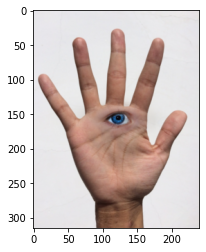

In [384]:
show_image(blended_pyr[-1])

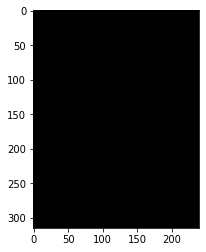

In [335]:
show_image(blended_pyr[2])

In [385]:
def reconstruct_pyr(pyr):
    blended = pyr[-1]
    for res in pyr[:-1][::-1]:
        blended = np.kron(blended, np.ones((2,2,1)))
        blended = np.array(blended)
        blended += res
    return blended
result = reconstruct_pyr(blended_pyr)

In [386]:
result = reconstruct_pyr(blended_pyr)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


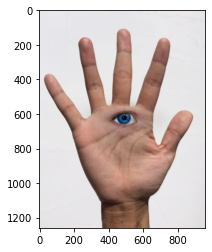

In [387]:
show_image(result)

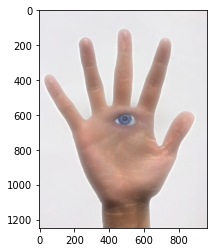